<a href="https://colab.research.google.com/github/AtufaShireen/AUTOEDA/blob/main/cv_basics/POC_for_Conv_and_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/FSDS_Feb_Batch/ALL_NOTES/Day-14"
os.chdir(ROOT)

In [ ]:
car_img_path = "car1.jpeg"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap="gray")
    return img
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)
  return img

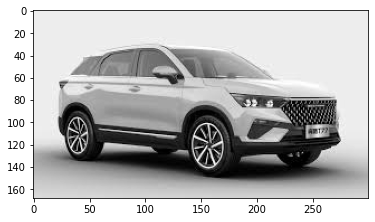

In [ ]:
car = read_img(car_img_path)

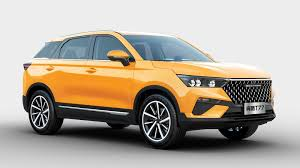

In [ ]:
color_car = read_img(car_img_path, grayscale=False)

In [ ]:
car.shape

(168, 300)

In [ ]:
color_car.shape

(168, 300, 3)

In [ ]:
# (1,r,c,1)
row,col = car.shape
car = car.reshape(1,row,col,1) # grayscale
# color_car = color_car.reshape(1,row,col,3) # colored
car.shape

(1, 168, 300, 1)

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
3*3 + 1

10

In [ ]:
out = conv_model.predict(car)

In [ ]:
out.shape

(1, 166, 298, 1)

In [ ]:
(168 - 3 + 0)//1 + 1

166

In [ ]:
(300 - 3 + 0)//1 + 1


298

In [ ]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [ ]:
reshape_out.shape

(166, 298)

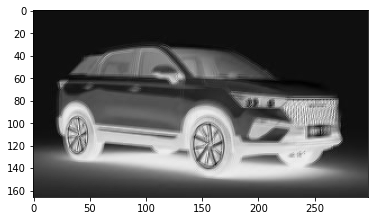

In [ ]:
plt.imshow(reshape_out, cmap="gray")

## For color image

In [ ]:
# (1,r,c,1)
row,col,depth = color_car.shape
# car = car.reshape(1,row,col,1) # grayscale
color_car = color_car.reshape(1,row,col,depth) # colored
color_car.shape

(1, 168, 300, 3)

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
3*3*3 + 1

28

In [ ]:
out = conv_model.predict(color_car)

In [ ]:
out.shape

(1, 166, 298, 1)

In [ ]:
(168 - 3 + 0)//1 + 1

166

In [ ]:
(300 - 3 + 0)//1 + 1


298

In [ ]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [ ]:
reshape_out.shape

(166, 298)

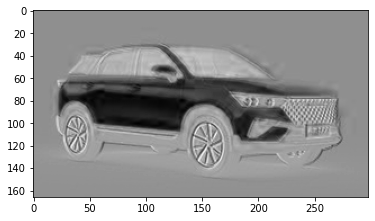

In [ ]:
plt.imshow(reshape_out, cmap="gray")

# TRY TO DISPLAY OUTPUT FOR 5 FILTERS

In [ ]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters, 
                                      kernel_size=filter_size, 
                                      strides=(1,1),
                                      input_shape=input_shape, 
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

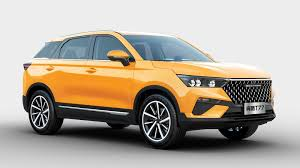

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


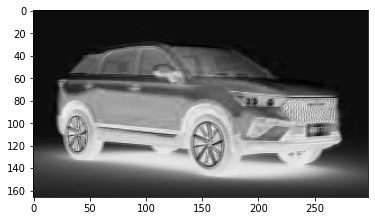

In [ ]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

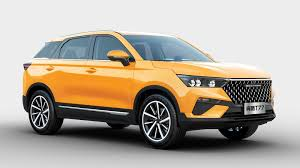

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 166, 298, 10)      280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 10)


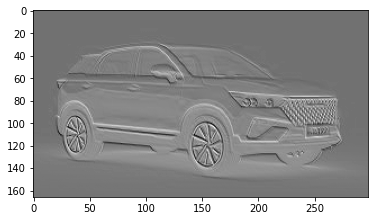

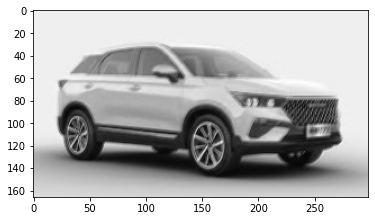

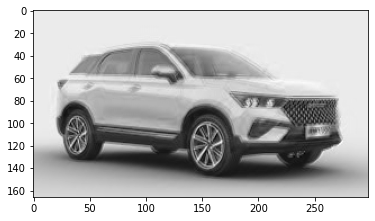

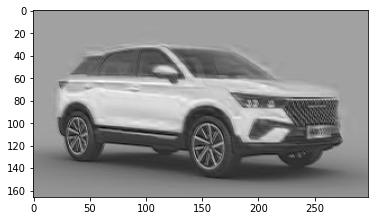

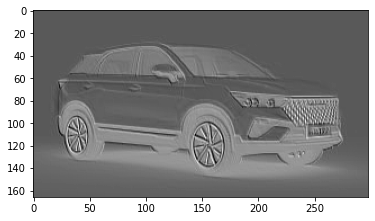

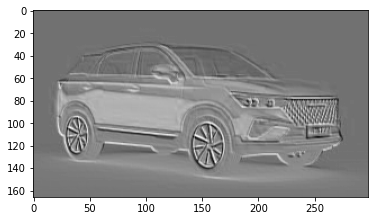

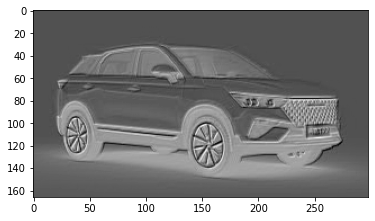

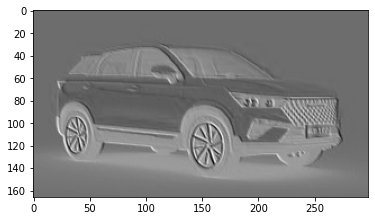

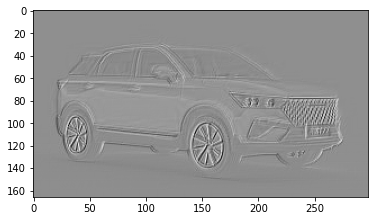

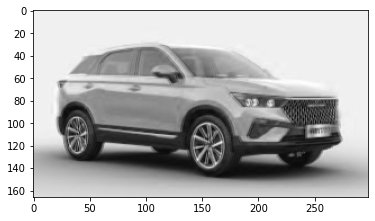

In [ ]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

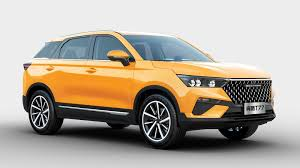

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 168, 300, 10)      280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________
(1, 168, 300, 10)


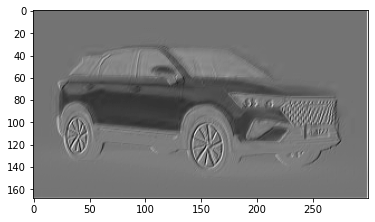

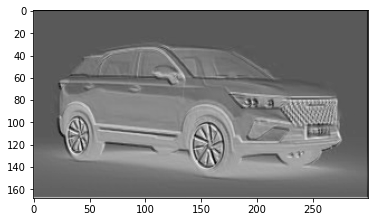

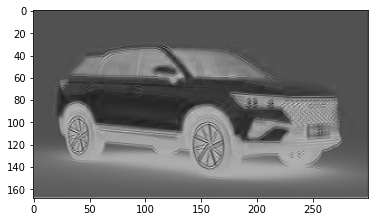

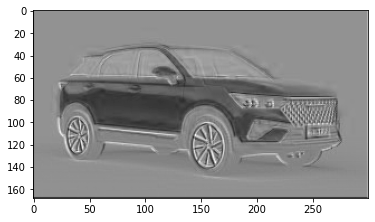

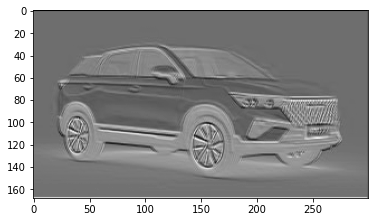

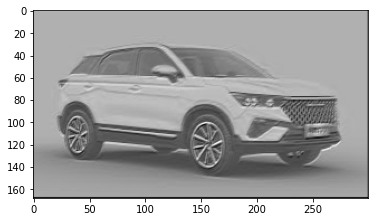

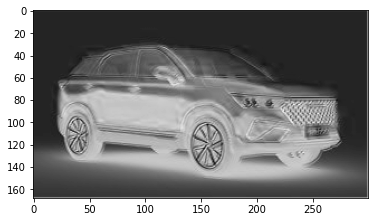

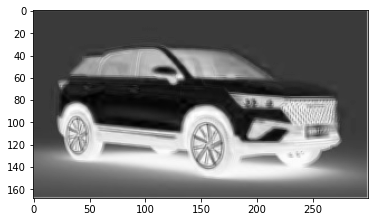

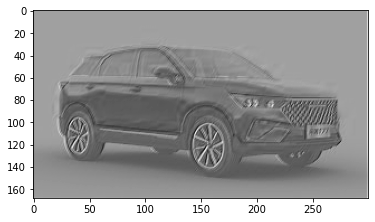

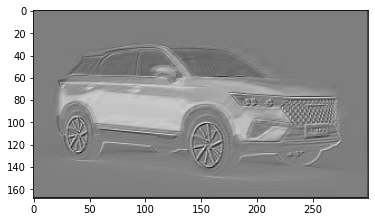

In [ ]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:], padding="same")
apply_conv_model_and_visualize(input_img, model)

In [ ]:

def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

(168, 300)
(1, 84, 150, 1)


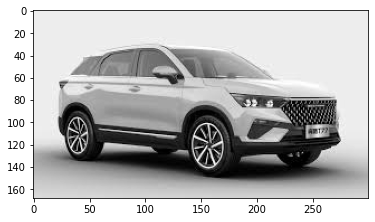

In [ ]:
img = read_img(car_img_path)
print(img.shape)
result = max_pooling(img)
print(result.shape)


In [ ]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape = tf.reshape(result, (row, col))
  plt.imshow(reshape, cmap="gray")

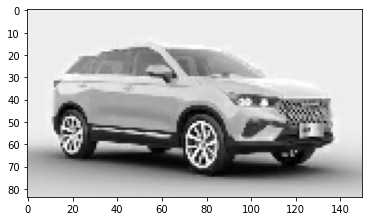

In [ ]:
plot_pooling(result)

In [ ]:
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))

In [ ]:
result = max_pooling(reshape.numpy())
print(result.shape)

(1, 42, 75, 1)


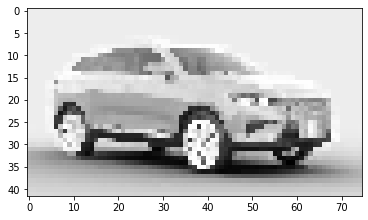

In [ ]:
plot_pooling(result)


# GlobalAvgPool2D

In [ ]:

def global_avg_pooling(img, grayscale):

  reshaped_img = reshaping_in(img, grayscale)
  pooling_layer = tf.keras.layers.GlobalAvgPool2D()
  result = pooling_layer(reshaped_img)
  return result

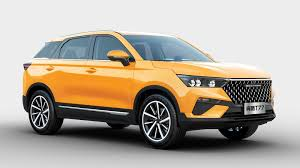

(168, 300, 3)
(1, 3)
tf.Tensor([[153 166 174]], shape=(1, 3), dtype=uint8)


In [ ]:
img = read_img(car_img_path, grayscale=False)
print(img.shape)
result = global_avg_pooling(img, grayscale=False)
print(result.shape)
print(result)

In [ ]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape = tf.reshape(result, (row, col))
  plt.imshow(reshape, cmap="gray")

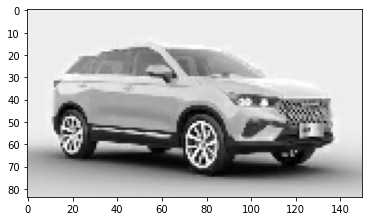

In [ ]:
plot_pooling(result)

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:],
                                    activation="relu" ),
              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
              tf.keras.layers.GlobalAveragePooling2D(),
              tf.keras.layers.Dense(10,activation="relu"),
              tf.keras.layers.Dense(2,activation="softmax")]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

In [ ]:
# model.save("model.h5")

# data -

csv data
img_path, label


data
- truck
- car